## Rede Neural Artificial (Multi Layer Perceptron)

Este trabalho consiste na implementação de uma Rede Neural Artificial (RNA) utilizando a biblioteca Scikit Learn do Python. O problema escolhido é caracterizado como problema de classificação, onde, através de 11 características (features) de 918 pacientes, deseja-se saber se determinado paciente poderia desenvolver ou não doença cardiovascular (target). Os dados foram obtidos através da plataforma Kaggle (https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv) e disponibilizados pela Universidade da Califórnia Irvine.
Para o experimento, foi considerado as seguintes condições:
1. Dataset de jogos de OverWatch ou outro do Kaggle;
2. Dividir o dataset em treino, desenvolvimento e teste. Desenvolvimento será utilizado para encontrar o melhor modelo de rede de acordo com seus parâmetros;
3. A rede deve ser treinada no conjunto de treino e calibrada no conjunto de desenvolvimento. Variar os seguintes parâmetros: taxa de aprendizado, número de camadas e função de ativação;
4. A calibração deve ser otimizada pela acurácia ou macro-f1;
5. Comparar para o conjunto de teste, o melhor modelo de rede neural encontrado contra um classificador por Regressão Logística;
6. Seu conjunto de dados deve ser padronizado utilizando z-score. Deve ser feito a geração das estatísticas no treino (fit) e com isso, aplicar a padronização nos conjuntos de treino, desenvolvimento e teste;
7. No conjunto de teste, gerar a matriz de confusão e métricas de f1 e acurácia.

### Preparação dos dados

Algumas features passaram por um pré-processamento para serem utilizadas pelos algoritmos de machine learning. Foo feito o seguinte mapeamento dos dados textuais para o formato de números:
1. Sex: M=1, F=2
2. ChestPain: ATA=1, NAP=2, ASY=3
3. RestingECG: Normal=1, ST=2, LVH=3
4. ExerciseA: Y=1, N=0
5. ST_Slope: Up=1, Flat=2, Down=3

### Importando as bibliotecas que serão utilizadas

In [ ]:
#Modelos de ML
from sklearn.neural_network import MLPClassifier #Multi Layer Percetron Classifier
from sklearn.linear_model import LogisticRegression #Regressao Logistica

#Metricas e pré-processamento
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #necessario: matriz de confusao (problemas de classificacao)
from sklearn.metrics import accuracy_score #necessario: acuracia
from sklearn.metrics import classification_report#necessario: metricas f1
from sklearn.metrics import r2_score #erro quadratico
from sklearn.model_selection import train_test_split #Separacao dos dados
from sklearn.preprocessing import StandardScaler #Z-score

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Importando o dataset

In [ ]:
#Forma final
data = pd.read_csv("heart.csv")

### Preparando os dados para o desenvolvimento, treinamento e teste


In [ ]:
x = data.iloc[:, 0:11]
y = data[["HeartDisease"]].values.ravel()

escala = StandardScaler()
escala.fit(x)
xNorm = escala.transform(x)

#Separação do conjunto de dados para desenvolvimento
xRemaining, xDev, yRemaining, yDev = train_test_split(xNorm, y, test_size=0.20)

#Dados para desenvolvimento
xDevTrain, xDevTest, yDevTrain, yDevTest = train_test_split(xDev, yDev, test_size=0.50)

#Dados para treinamento e Teste
xTrain, xTest, yTrain, yTest = train_test_split(xRemaining, yRemaining, test_size=0.30)

### Desenvolvimento: Parametrizando para encontrar o melhor modelo de

In [ ]:
rnaDev = MLPClassifier(hidden_layer_sizes=(8,8,8), #necessario: variar numero camadas
                    max_iter=3000,
                    tol=0.000000100,
                    learning_rate_init=0.01, #necessario: variar taxa de aprendizado
                    solver="adam",
                    activation="relu", #necessario: variar funcao de ativacao
                    learning_rate="constant",
                    verbose=True,
                    random_state = 0
                  )
rnaDev.fit(xDevTrain,yDevTrain)

Iteration 1, loss = 0.85512281
Iteration 2, loss = 0.79846885
Iteration 3, loss = 0.74855536
Iteration 4, loss = 0.70483537
Iteration 5, loss = 0.66959962
Iteration 6, loss = 0.64206879
Iteration 7, loss = 0.61952552
Iteration 8, loss = 0.60129853
Iteration 9, loss = 0.58577122
Iteration 10, loss = 0.57069541
Iteration 11, loss = 0.55468937
Iteration 12, loss = 0.53812890
Iteration 13, loss = 0.52125769
Iteration 14, loss = 0.50433830
Iteration 15, loss = 0.48788461
Iteration 16, loss = 0.47191435
Iteration 17, loss = 0.45586561
Iteration 18, loss = 0.44062576
Iteration 19, loss = 0.42701665
Iteration 20, loss = 0.41459412
Iteration 21, loss = 0.40330505
Iteration 22, loss = 0.39328513
Iteration 23, loss = 0.38456857
Iteration 24, loss = 0.37713490
Iteration 25, loss = 0.37077659
Iteration 26, loss = 0.36432847
Iteration 27, loss = 0.35756086
Iteration 28, loss = 0.34978704
Iteration 29, loss = 0.34171631
Iteration 30, loss = 0.33341393
Iteration 31, loss = 0.32521826
Iteration 32, los

Iteration 300, loss = 0.00030173
Iteration 301, loss = 0.00029964
Iteration 302, loss = 0.00029755
Iteration 303, loss = 0.00029552
Iteration 304, loss = 0.00029352
Iteration 305, loss = 0.00029155
Iteration 306, loss = 0.00028958
Iteration 307, loss = 0.00028764
Iteration 308, loss = 0.00028573
Iteration 309, loss = 0.00028384
Iteration 310, loss = 0.00028196
Iteration 311, loss = 0.00028008
Iteration 312, loss = 0.00027825
Iteration 313, loss = 0.00027642
Iteration 314, loss = 0.00027464
Iteration 315, loss = 0.00027284
Iteration 316, loss = 0.00027129
Iteration 317, loss = 0.00026946
Iteration 318, loss = 0.00026780
Iteration 319, loss = 0.00026616
Iteration 320, loss = 0.00026452
Iteration 321, loss = 0.00026289
Iteration 322, loss = 0.00026127
Iteration 323, loss = 0.00025966
Iteration 324, loss = 0.00025808
Iteration 325, loss = 0.00025649
Iteration 326, loss = 0.00025492
Iteration 327, loss = 0.00025339
Iteration 328, loss = 0.00025187
Iteration 329, loss = 0.00025034
Iteration 

Iteration 620, loss = 0.00009346
Iteration 621, loss = 0.00009329
Iteration 622, loss = 0.00009311
Iteration 623, loss = 0.00009294
Iteration 624, loss = 0.00009277
Iteration 625, loss = 0.00009259
Iteration 626, loss = 0.00009242
Iteration 627, loss = 0.00009224
Iteration 628, loss = 0.00009208
Iteration 629, loss = 0.00009191
Iteration 630, loss = 0.00009173
Iteration 631, loss = 0.00009157
Iteration 632, loss = 0.00009140
Iteration 633, loss = 0.00009123
Iteration 634, loss = 0.00009107
Iteration 635, loss = 0.00009091
Iteration 636, loss = 0.00009074
Iteration 637, loss = 0.00009058
Iteration 638, loss = 0.00009041
Iteration 639, loss = 0.00009025
Iteration 640, loss = 0.00009009
Iteration 641, loss = 0.00008993
Iteration 642, loss = 0.00008977
Iteration 643, loss = 0.00008962
Iteration 644, loss = 0.00008946
Iteration 645, loss = 0.00008930
Iteration 646, loss = 0.00008915
Iteration 647, loss = 0.00008899
Iteration 648, loss = 0.00008883
Iteration 649, loss = 0.00008868
Iteration 

MLPClassifier(hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.01,
              max_iter=3000, random_state=0, tol=1e-07, verbose=True)

In [ ]:
rnaDevPredicted = rnaDev.predict(xDevTest)
print("Acurácia: ", accuracy_score(yDevTest, rnaDevPredicted))

Acurácia:  0.7934782608695652


### Treinamento: O modelo com a parametrização anterior

In [ ]:
rna = MLPClassifier(hidden_layer_sizes=(8,8,8), #necessario: variar numero camadas
                    max_iter=3000,
                    tol=0.000000100,
                    learning_rate_init=0.01,
                    solver="adam",
                    activation="relu",
                    learning_rate="constant",
                    verbose=True,
                  )
rna.fit(xTrain,yTrain)


Iteration 1, loss = 0.74680315
Iteration 2, loss = 0.66785467
Iteration 3, loss = 0.62575660
Iteration 4, loss = 0.58874155
Iteration 5, loss = 0.54885391
Iteration 6, loss = 0.50978346
Iteration 7, loss = 0.48004691
Iteration 8, loss = 0.45669941
Iteration 9, loss = 0.43913601
Iteration 10, loss = 0.42217096
Iteration 11, loss = 0.40716754
Iteration 12, loss = 0.39779787
Iteration 13, loss = 0.38776241
Iteration 14, loss = 0.37840069
Iteration 15, loss = 0.36908970
Iteration 16, loss = 0.36200732
Iteration 17, loss = 0.35550920
Iteration 18, loss = 0.34984549
Iteration 19, loss = 0.34367372
Iteration 20, loss = 0.34078124
Iteration 21, loss = 0.33540499
Iteration 22, loss = 0.32996479
Iteration 23, loss = 0.32585699
Iteration 24, loss = 0.32059170
Iteration 25, loss = 0.31593836
Iteration 26, loss = 0.31167559
Iteration 27, loss = 0.30708820
Iteration 28, loss = 0.30311538
Iteration 29, loss = 0.29940197
Iteration 30, loss = 0.29524433
Iteration 31, loss = 0.29259507
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.01,
              max_iter=3000, tol=1e-07, verbose=True)

### Treinamento: Um modelo de Regressão Logística para comparação

In [ ]:
rl = LogisticRegression(max_iter=2000,
                        tol=0.0001,
                        )
rl.fit(xTrain, yTrain)

LogisticRegression(max_iter=2000)

### Teste: Avaliando a precisão dos modelos

In [ ]:
yPredictedRna = rna.predict(xTest)
yPredictedRl = rl.predict(xTest)

print("Acuracia RNA: ",accuracy_score(yTest,yPredictedRna)) #rna.score(xTestNorm, yTest)
print("Acuracia Logistic Regression: ",accuracy_score(yTest,yPredictedRl))

Acuracia RNA:  0.8506787330316742
Acuracia Logistic Regression:  0.8914027149321267


### Métricas de F1

In [ ]:
print(classification_report(yTest, yPredictedRna, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83        96
           1       0.87      0.87      0.87       125

    accuracy                           0.85       221
   macro avg       0.85      0.85      0.85       221
weighted avg       0.85      0.85      0.85       221



In [ ]:
print(classification_report(yTest, yPredictedRl, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        96
           1       0.89      0.93      0.91       125

    accuracy                           0.89       221
   macro avg       0.89      0.89      0.89       221
weighted avg       0.89      0.89      0.89       221



### Matriz de confusão

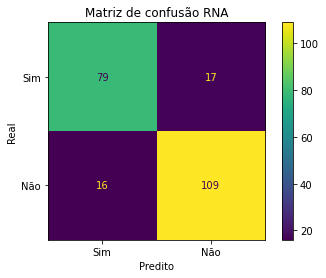

In [ ]:
cm = confusion_matrix(yTest, yPredictedRna)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Sim', 'Não'])
cmd_obj.plot()

cmd_obj.ax_.set(
                title='Matriz de confusão RNA', 
                xlabel='Predito', 
                ylabel='Real')
plt.show()


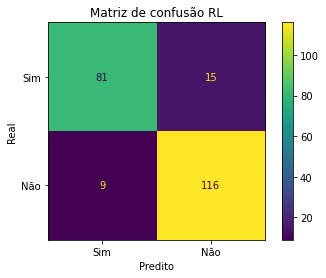

In [ ]:
cm = confusion_matrix(yTest, yPredictedRl)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['Sim', 'Não'])
cmd_obj.plot()

cmd_obj.ax_.set(
                title='Matriz de confusão RL', 
                xlabel='Predito', 
                ylabel='Real')
plt.show()

### Resultado

A partir dos experimentos feitos para este dataset, foi possível observar que a regressão logística apresentou uma acurácia superior ao modelo de rede neural. Foram feitos diversos treinamentos com modificações na parametrização dos modelos e em sua maioria a RNA se mostrou com acurácia inferior à regressão logística. Porém, ambos os modelos apresentaram resultados próximos, com uma boa taxa de acerto nas predições.